# Többváltozós analízis mérnöki alkalmazásai projekt

## Snake

### Hogy állunk jelenleg?

- A játék egy objektumon keresztül folyik
- A megjelenítés még nem az igazi
- A pálya zárt, négyzet alakú. (Nem lehet átmenni a falon mint egy topológialag tórusznak tekinthető pályán)

In [4]:
import numpy as np
from matplotlib import pyplot as plt
import random
import time

In [5]:
class kigyo:
    palyaSize = 50 #hányszor hányas legyen a pálya //Mivel ez egy hiperparaméter lehet inkább legyen globális?
    palya = np.ones((palyaSize,palyaSize))
    fej = (25,25)#legyen monajuk a pálya közepén (parametrikusan elegánsabb)
    snake = []#ebbe a tömbbe pakoljuk a kígyó testét
    snake.append(fej)#rakjuk is bele a fejét
    kaja = (20,25)#hol van a kaja
    isAlive = True #él e még az adott példány
    steps = 0 #hány lépést élt meg az adott példány... (ez az AIhoz jöhet jól)
    #Egy konstruktor biztosan nem árt meg...
    def __init__(self,nev):
        self.name = nev #ez még nem fontos ,de később még jól jöhet 
    def ujKaja(self):#Arra majd még figyelni kell hogy az új kaja ne legyen a kígyóban...
        x = random.randint(0,self.palyaSize)#Véletlenszerűen új helyet keresünk neki
        y = random.randint(0,self.palyasize)
        return (x,y)
    #hogy mozogni is tudjon...
    def move(self,direction):
        if(direction == 0):#felfele megy
            self.fej = (self.fej[0]-1,self.fej[1])
            self.utkozike() #Meghaltnk-e?
            #kajál -e?
            if (self.fej == self.kaja):
                self.snake.insert(0,self.fej)#Ez esetben csak nő
                self.kaja= self.ujKaja()#Új kaját kell generálni
            else:
                self.snake.pop()#A végét levágjuk
                self.snake.insert(0,self.fej)#megy tovább a fej irányába
        #jobbra megy
        if(direction == 1):
            self.fej = (self.fej[0],self.fej[1]+1)
            self.utkozike()
            if (self.fej == self.kaja):
                self.snake.insert(0,self.fej)
                self.kaja= self.ujKaja()
            else:
                self.snake.pop()
                self.snake.insert(0,self.fej)
        #lefelé megy
        if(direction == 2):
            self.fej = (self.fej[0]+1,self.fej[1])
            self.utkozike()
            if (self.fej == self.kaja):
                self.snake.insert(0,self.fej)
                self.kaja= self.ujKaja()
            else:
                self.snake.pop()
                self.snake.insert(0,self.fej)
        #balra megy
        if(direction == 3):
            self.fej = (self.fej[0],self.fej[1]-1)
            self.utkozike()
            #kajál -e?
            if (self.fej == self.kaja):
                self.snake.insert(0,self.fej)
                self.kaja= self.ujKaja()
            else:
                self.snake.pop()
                self.snake.insert(0,self.fej)        
        
    #Hogy ki is rajzolhassuk
    def mutat(self):
        if(self.isAlive):
            self.palya= np.zeros((self.palyaSize,self.palyaSize))#Tisztítsuk meg a palyat
            for i in self.snake:
                self.palya[i]=1 #ahol a kigyo van ott legyen 1
            self.palya[self.kaja]=0.5 #ahol a kaja van ott pedig 0
            #ezt lehet cv2-vel kéne csináli, mert így csak a végén íratja ki...
            plt.imshow(self.palya, cmap='gray')
            #Ha a következő sort kikommentelitek akkor pedig mindig új ábrát hoz létre...
            #plt.show()
    def utkozike(self):
        if(self.fej[0]==-1 or self.fej[0]==self.palyaSize or self.fej[1]==-1 or self.fej[1]==self.palyaSize):
            print("meghaltal")#Ha kimegy a pályáról
            self.isAlive = False
        elif(self.fej in self.snake[1:]):#ez így nem jól münködik még...
            print("meghaltal")#Ha önmagába ütközik
            self.isAlive = False
    

[(25, 24)]
[(26, 24)]
[(25, 24)]
[(25, 25)]
[(24, 25)]
[(23, 25)]
[(22, 25)]
[(22, 24)]
[(22, 25)]
[(22, 26)]
[(22, 25)]
[(21, 25)]
[(21, 26)]
[(20, 26)]
[(19, 26)]
[(19, 25)]
[(19, 24)]
[(19, 25)]
[(19, 26)]
[(20, 26)]
[(20, 27)]
[(19, 27)]
[(19, 28)]
[(19, 29)]
[(20, 29)]
[(19, 29)]
[(19, 28)]
[(19, 29)]
[(19, 28)]
[(19, 27)]
[(20, 27)]
[(20, 28)]
[(19, 28)]
[(18, 28)]
[(17, 28)]
[(16, 28)]
[(16, 27)]
[(16, 26)]
[(15, 26)]
[(16, 26)]
[(16, 25)]
[(17, 25)]
[(16, 25)]
[(15, 25)]
[(15, 26)]
[(15, 25)]
[(16, 25)]
[(16, 26)]
[(16, 27)]
[(16, 28)]
[(15, 28)]
[(16, 28)]
[(15, 28)]
[(15, 27)]
[(16, 27)]
[(16, 26)]
[(16, 27)]
[(16, 28)]
[(15, 28)]
[(15, 27)]
[(14, 27)]
[(13, 27)]
[(14, 27)]
[(14, 28)]
[(15, 28)]
[(15, 27)]
[(15, 28)]
[(14, 28)]
[(14, 29)]
[(14, 30)]
[(14, 29)]
[(13, 29)]
[(12, 29)]
[(11, 29)]
[(12, 29)]
[(13, 29)]
[(14, 29)]
[(14, 30)]
[(14, 29)]
[(14, 30)]
[(15, 30)]
[(14, 30)]
[(14, 29)]
[(15, 29)]
[(15, 28)]
[(15, 29)]
[(16, 29)]
[(16, 30)]
[(16, 31)]
[(16, 32)]
[(17, 32)]

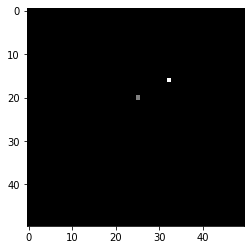

In [7]:
#itt lehet próbálgatni a funkciókat...
pl = kigyo("elso")
#print(pl.snake)
for i in range(100): # véletlen lépegetés
    irany = random.randint(0,3)
    if(pl.isAlive):
        pl.move(irany)  
        print(pl.snake)# Ez csak azért van itt hogy lássuk merre megy. Amúgy majd kikommentelendő
pl.mutat()
del pl